In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("default")

In [3]:
df = pd.read_csv("I:/predictive maintenance ml/data/ai4i2020.csv")

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


In [8]:
column_map = {
    "UDI": "uid",
    "Product ID": "product_id",
    "Type": "type",
    "Air temperature [K]": "air_temperature_k",
    "Process temperature [K]": "process_temperature_k",
    "Rotational speed [rpm]": "rotational_speed_rpm",
    "Torque [Nm]": "torque_nm",
    "Tool wear [min]": "tool_wear_min",
    "Machine failure": "machine_failure",
}

df = df.rename(columns={c: column_map.get(c, c) for c in df.columns})
df["machine_failure"] = df["machine_failure"].astype(int)

df.head()


,uid,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [11]:
df["machine_failure"].value_counts()

machine_failure
0    9661
1     339
Name: count, dtype: int64

In [12]:
df["machine_failure"].value_counts(normalize=True) * 100

machine_failure
0    96.61
1     3.39
Name: proportion, dtype: float64

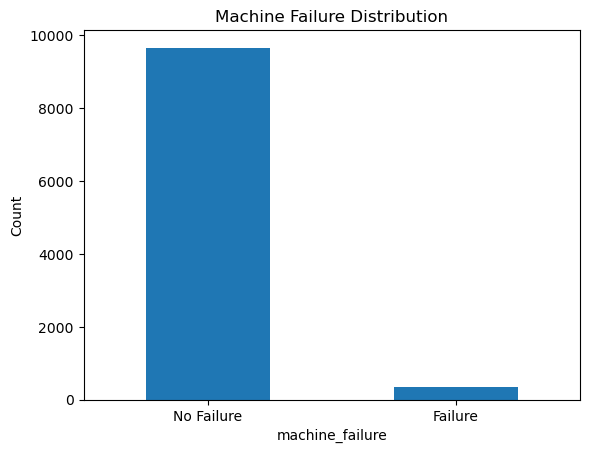

In [13]:
fig, ax = plt.subplots()
df["machine_failure"].value_counts().plot(kind="bar", ax=ax)
ax.set_xticks([0, 1])
ax.set_xticklabels(["No Failure", "Failure"], rotation=0)
ax.set_ylabel("Count")
ax.set_title("Machine Failure Distribution")
plt.show()

In [14]:
numeric_features = [
    "air_temperature_k",
    "process_temperature_k",
    "rotational_speed_rpm",
    "torque_nm",
    "tool_wear_min",
]

df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
air_temperature_k,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
process_temperature_k,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
rotational_speed_rpm,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
torque_nm,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
tool_wear_min,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0


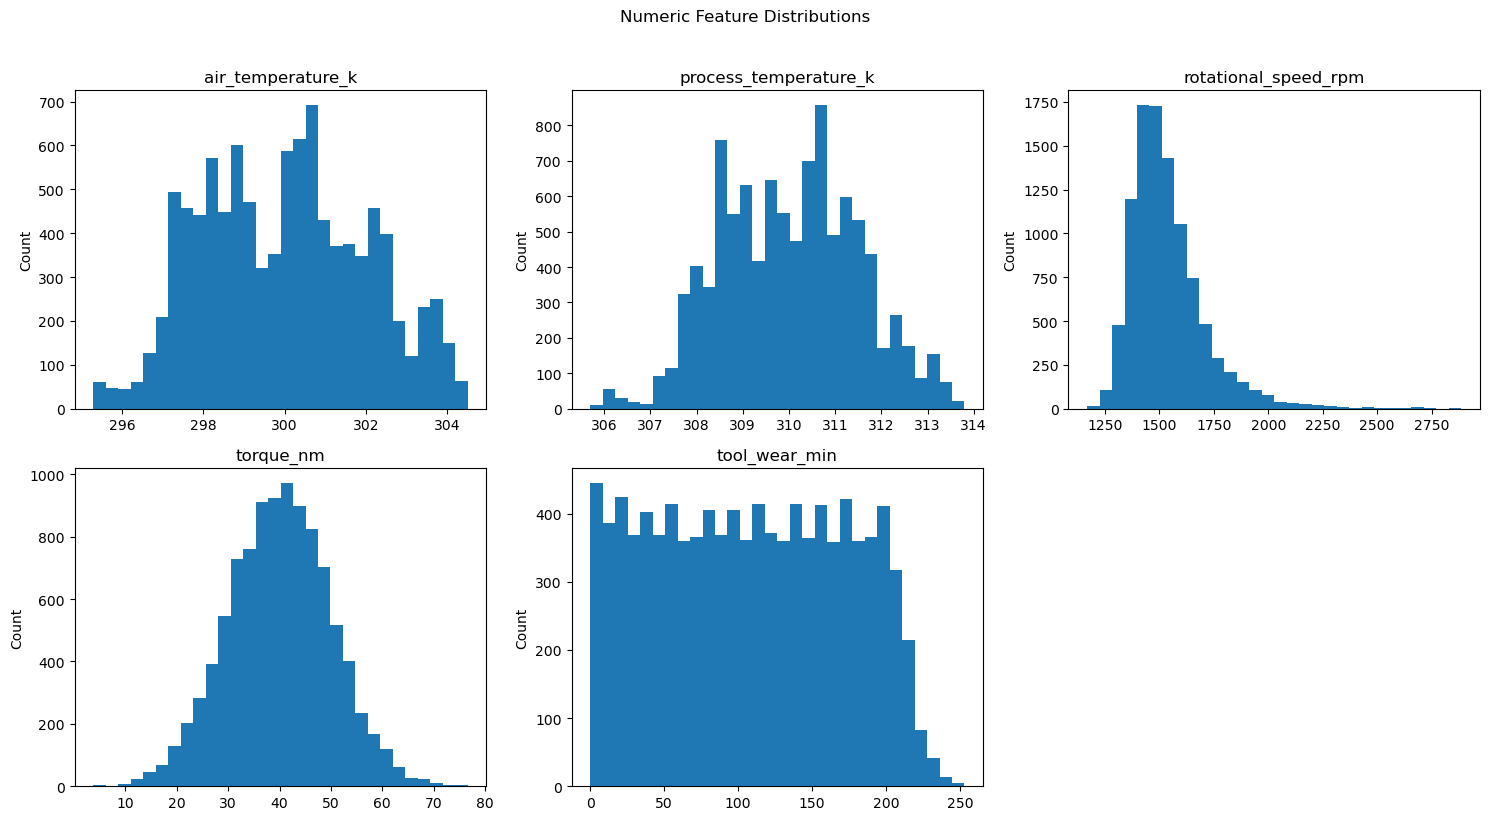

In [15]:
#Distribution of numeric feature
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_ylabel("Count")

for j in range(len(numeric_features), len(axes)):
    axes[j].axis("off")

plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

In [17]:
df.groupby("machine_failure")[numeric_features].mean()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
machine_failure,,,,,
0,299.973999,309.995570,1540.260014,39.629655,106.693717
1,300.886431,310.290265,1496.486726,50.168142,143.781711


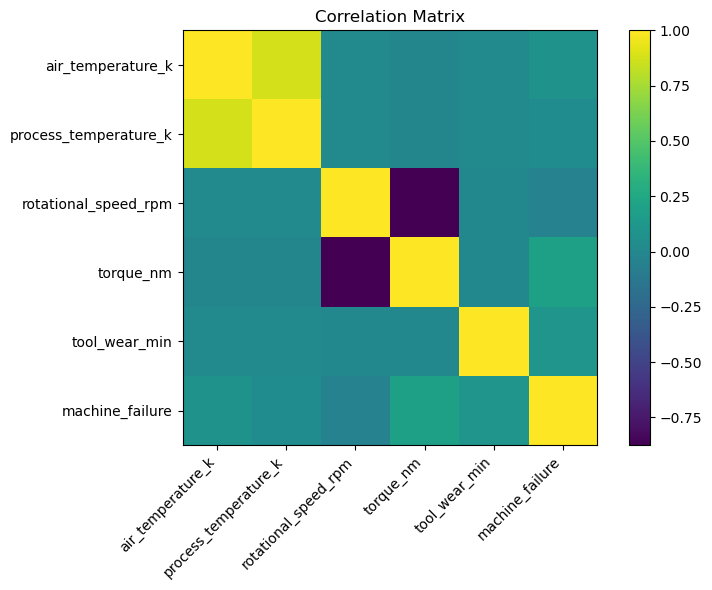

In [18]:
corr = df[numeric_features + ["machine_failure"]].corr()

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr, interpolation="nearest")
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.columns)
fig.colorbar(im)
ax.set_title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [19]:
df["type"].value_counts()

type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [20]:
pd.crosstab(df["type"], df["machine_failure"], normalize="index") * 100

machine_failure,0,1
type,,
H,97.906281,2.093719
L,96.083333,3.916667
M,97.230564,2.769436


In [21]:
#Train-test split & preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df[numeric_features + ["product_id", "type"]]
y = df["machine_failure"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["product_id", "type"]),
    ]
)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)


In [22]:
#Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

baseline_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

baseline_model.fit(X_train_prep, y_train)

baseline_preds = baseline_model.predict(X_test_prep)
baseline_probs = baseline_model.predict_proba(X_test_prep)[:, 1]

print("Baseline Logistic Regression")
print("Accuracy :", accuracy_score(y_test, baseline_preds))
print("ROC-AUC  :", roc_auc_score(y_test, baseline_probs))
print(classification_report(y_test, baseline_preds))


Baseline Logistic Regression
Accuracy : 0.9345
ROC-AUC  : 0.9036049202289612
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1932
           1       0.29      0.65      0.40        68

    accuracy                           0.93      2000
   macro avg       0.64      0.80      0.68      2000
weighted avg       0.96      0.93      0.95      2000



In [24]:
#Main Model
from xgboost import XGBClassifier

pos = sum(y_train == 1)
neg = sum(y_train == 0)
scale_pos_weight = neg / pos

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    tree_method="hist",
    n_jobs=-1
)

xgb_model.fit(X_train_prep, y_train)

xgb_preds = xgb_model.predict(X_test_prep)
xgb_probs = xgb_model.predict_proba(X_test_prep)[:, 1]

print("XGBoost Model")
print("Accuracy :", accuracy_score(y_test, xgb_preds))
print("ROC-AUC  :", roc_auc_score(y_test, xgb_probs))
print(classification_report(y_test, xgb_preds))


XGBoost Model
Accuracy : 0.975
ROC-AUC  : 0.9735644257703081
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.60      0.78      0.68        68

    accuracy                           0.97      2000
   macro avg       0.80      0.88      0.83      2000
weighted avg       0.98      0.97      0.98      2000

